In [1]:
suppressMessages(library(dplyr))
library(ggplot2)
suppressMessages(library(BoutrosLab.plotting.general))
library(rhdf5)
library(ggpubr)
library(repr)
# Change plot size to BIG
options(repr.plot.width=20, repr.plot.height=10)

# Evaluate models fitted with continuous $X_1$ with counts simulated using discrete $X_1$ as observations

- $H_A$
- 1000 targeted genes
- 4 gRNAs per gene

In [2]:
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_disc-counts_targeting_v2"
# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

### Plot true vs. estimated $\beta_1$

In [3]:
head(alt.coeffs)

,term,estimate,true,gene,targeting
,<chr>,<dbl>,<dbl>,<int>,<lgl>
1,(Intercept),2.644596,2.666393,19,TRUE
2,guide.eff,0.184363,-2.578906,19,TRUE
3,s.score,1.724285,1.770983,19,TRUE
4,g2m.score,3.622624,3.596002,19,TRUE
5,percent.mito,4.046854,3.828926,19,TRUE
6,(Intercept),2.228017,2.241491,40,TRUE


`geom_smooth()` using formula 'y ~ x'



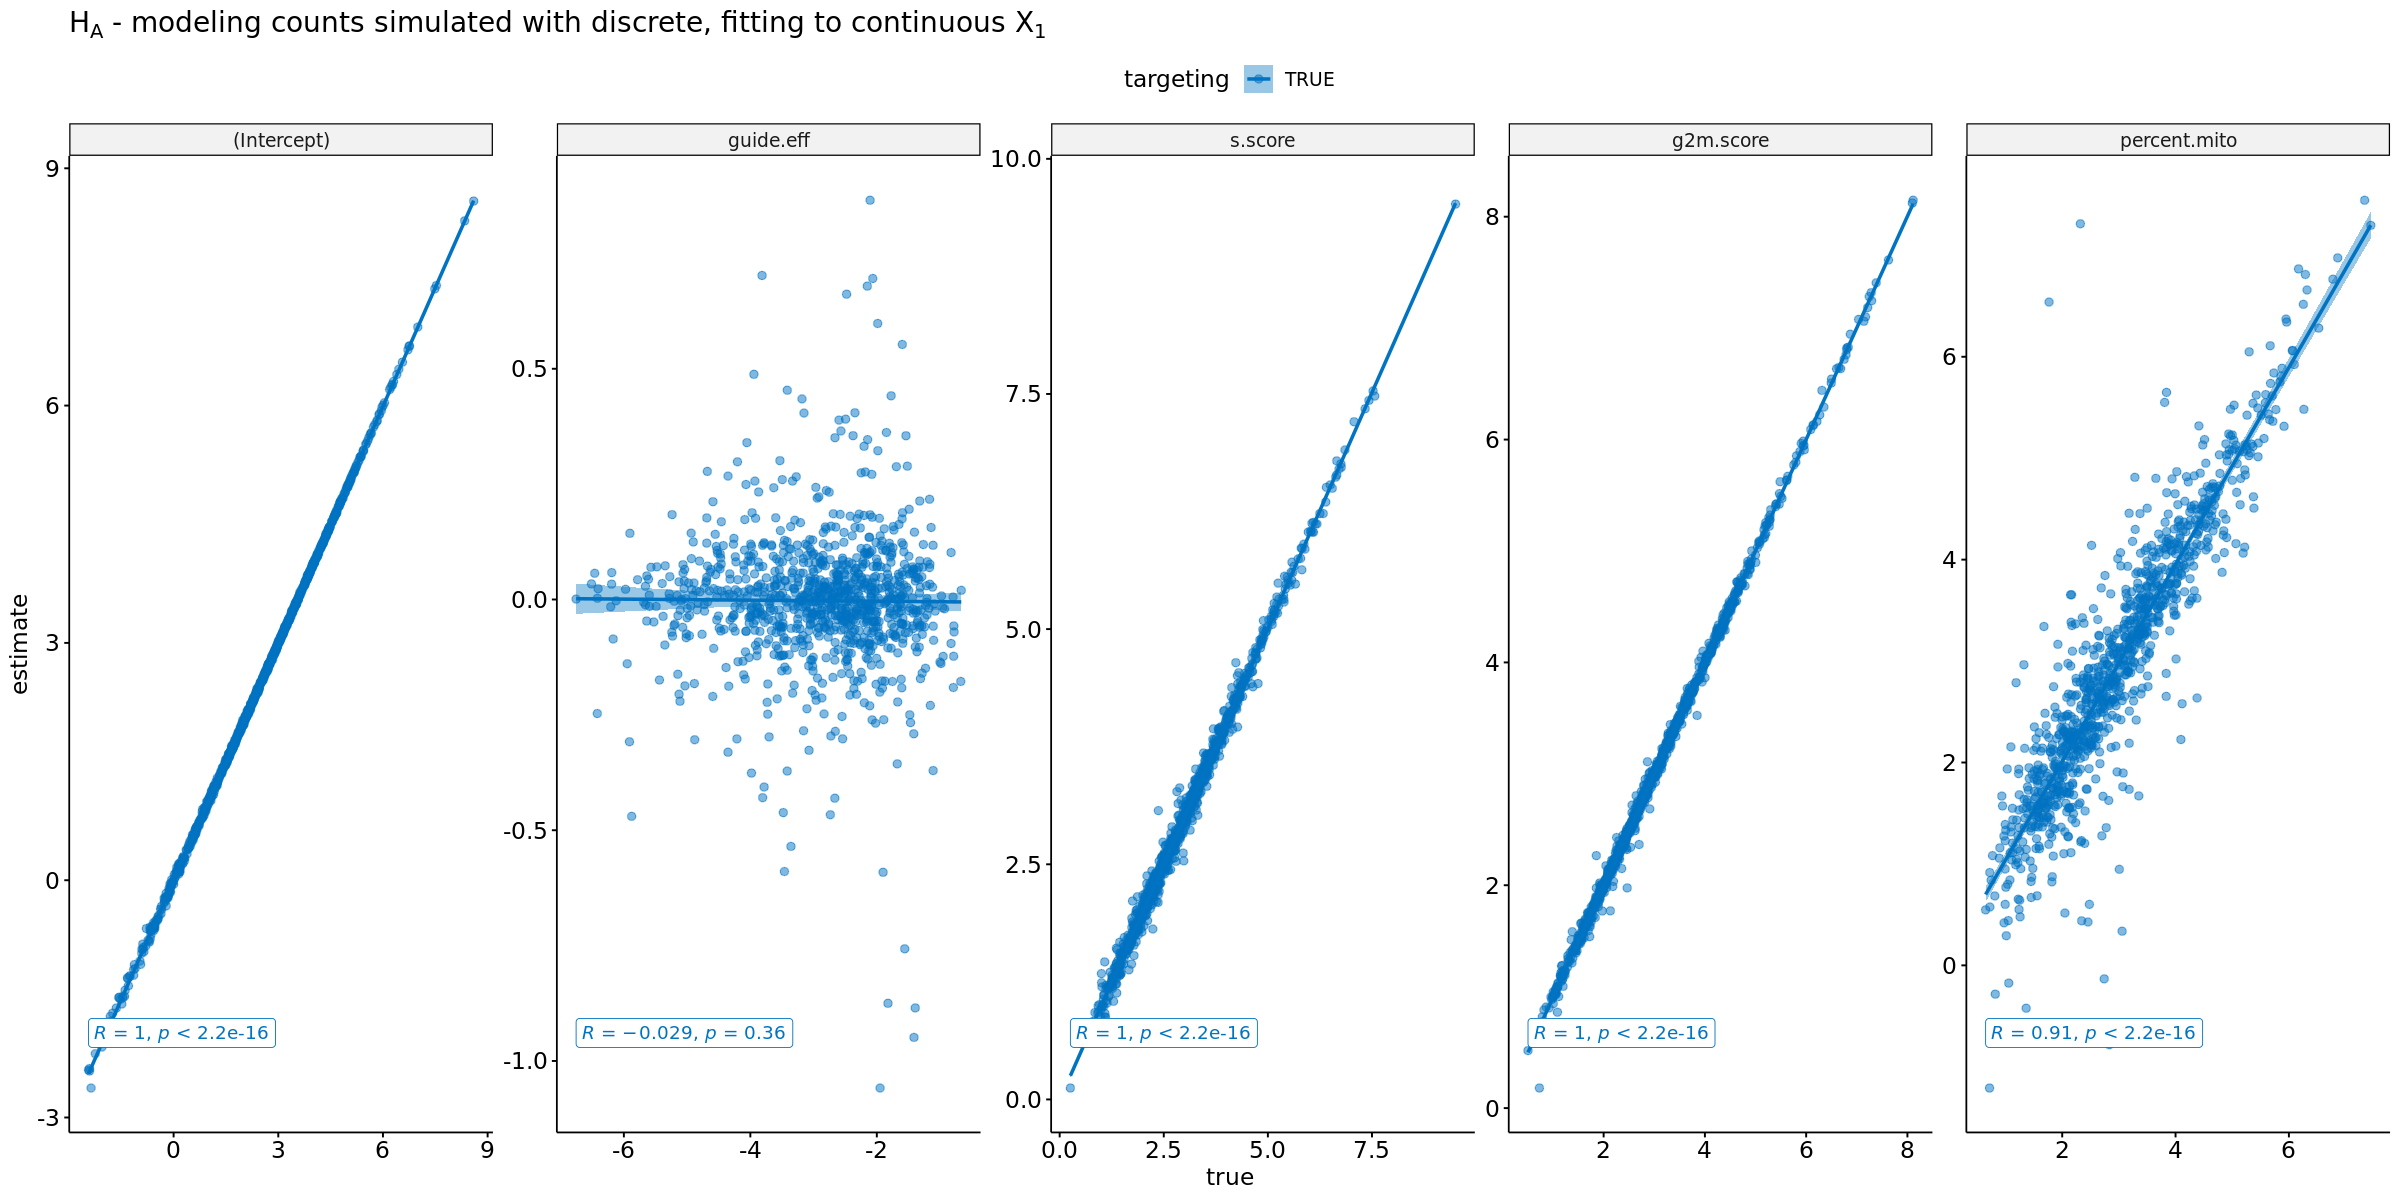

In [4]:
# rename coeffs for plot
coeff.names <- c("(Intercept)" = expression(beta[0]),
      "guide.eff" = expression(beta[1]),
      "s.score" = expression(beta[2]),
     "g2m.score" = expression(beta[3]),
     "percent.mito" = expression(beta[4]))

# plot
p <- alt.coeffs %>%
       mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
    ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
       add = "reg.line",  # Add regression line
              conf.int = TRUE
       ) + stat_cor(method = "spearman", aes(color = targeting), 
                    show.legend = FALSE, geom = "label", 
                    label.y.npc="bottom", label.x.npc = "left") + 
    facet_wrap(~term, ncol = 5, labeller =  as_labeller(coeff.names), scales = "free") + theme(text = element_text(size = 14)) +
ggtitle(expression(paste("H"[A] ," - modeling counts simulated with discrete, fitting to continuous X"[1])))

p

In [26]:
png(file.path(data.dir, "alt_coeffs_scatterplot_disc-counts_cont-x1.png"),
    res = 300, units = "in", height = 6, width = 12)
print(p)
dev.off()

tiff(file.path(data.dir, "alt_coeffs_scatterplot_disc-counts_cont-x1.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(p)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

# Evaluate models fitted with discrete $X_1$ with counts simulated using discrete $X_1$ as observations

- $H_A$
- 1000 targeted genes
- 4 gRNAs per gene

In [27]:
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_disc-x1_disc-counts_targeting"
# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

### Plot true vs. estimated $\beta_1$

`geom_smooth()` using formula 'y ~ x'



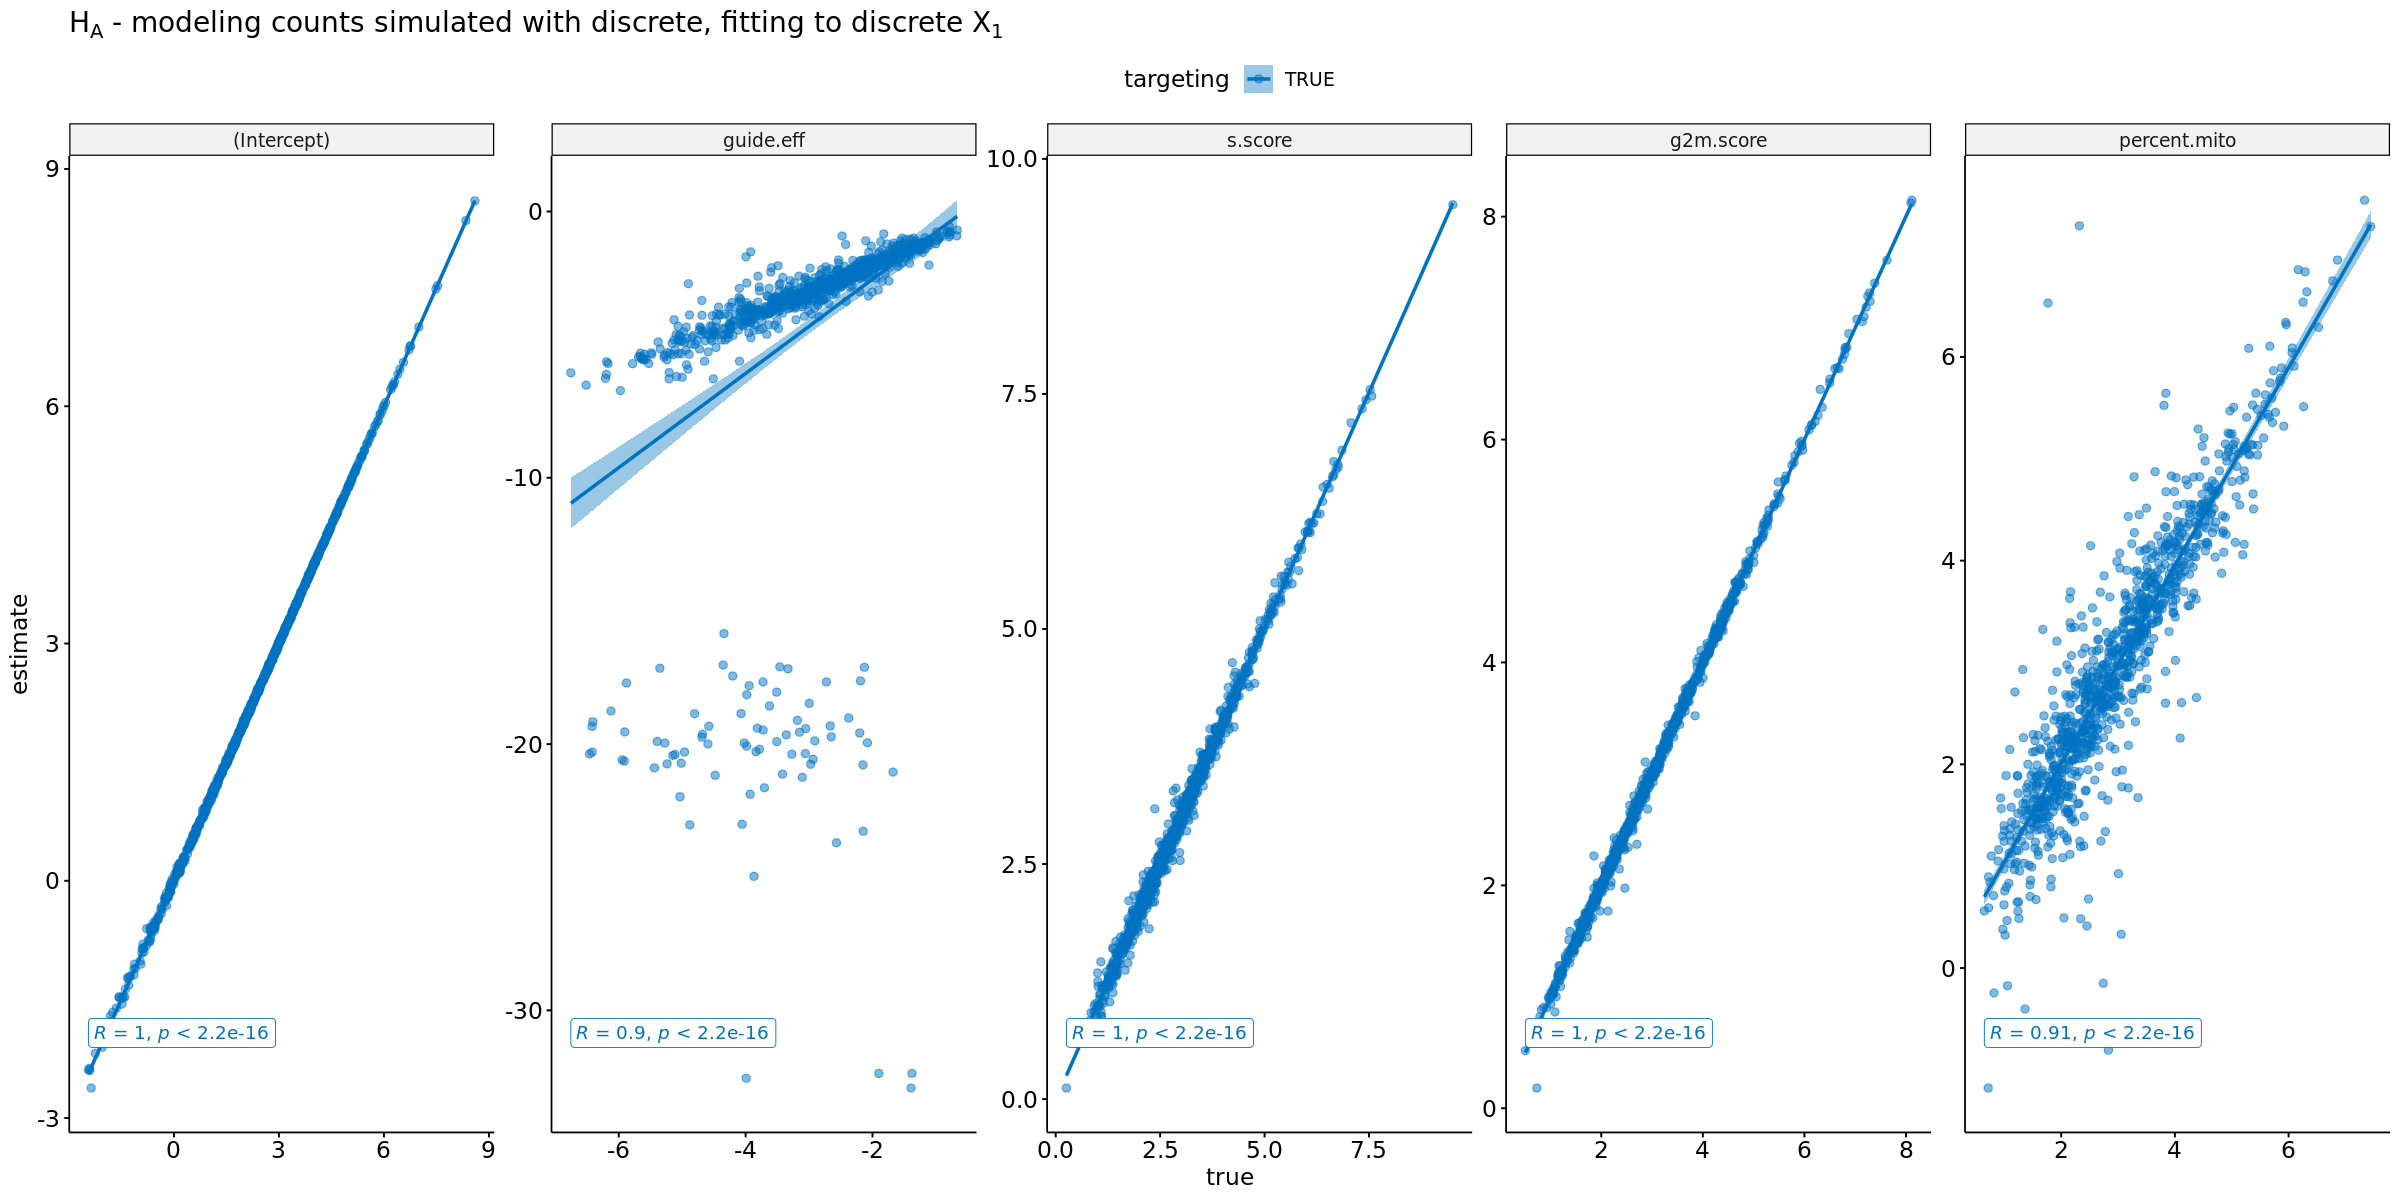

In [28]:
# rename coeffs for plot
coeff.names <- c("(Intercept)" = expression(beta[0]),
      "guide.eff" = expression(beta[1]),
      "s.score" = expression(beta[2]),
     "g2m.score" = expression(beta[3]),
     "percent.mito" = expression(beta[4]))

# plot
p <- alt.coeffs %>%
       mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
    ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
       add = "reg.line",  # Add regression line
              conf.int = TRUE
       ) + stat_cor(method = "spearman", aes(color = targeting), 
                    show.legend = FALSE, geom = "label", 
                    label.y.npc="bottom", label.x.npc = "left") + 
    facet_wrap(~term, ncol = 5, labeller =  as_labeller(coeff.names), scales = "free") + 
theme(text = element_text(size = 14)) + 
ggtitle(expression(paste("H"[A] ," - modeling counts simulated with discrete, fitting to discrete X"[1])))

p

In [29]:
png(file.path(data.dir, "alt_coeffs_scatterplot_disc-counts_disc-x1.png"),
    res = 300, units = "in", height = 6, width = 12)
print(p)
dev.off()

tiff(file.path(data.dir, "alt_coeffs_scatterplot_disc-counts_disc-x1.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(p)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

# Compare estimated coeffs to true for counts simulated with discrete $X_1$

In [10]:
sim.fh <- "/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_4guides_discrete_and_continuous/sim.h5"
h5ls(sim.fh)

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,coeffs,H5I_DATASET,COMPOUND,13000
1,/,counts,H5I_GROUP,,
2,/counts,continuous,H5I_DATASET,INTEGER,13000 x 50000
3,/counts,discrete,H5I_DATASET,INTEGER,13000 x 50000
4,/,guides,H5I_GROUP,,
5,/guides,est_efficiency_D10,H5I_DATASET,FLOAT,4000
6,/guides,est_efficiency_D100,H5I_DATASET,FLOAT,4000
7,/guides,metadata,H5I_DATASET,COMPOUND,4000
8,/guides,one_hot,H5I_DATASET,INTEGER,50000 x 4000


In [11]:
true.coeffs <- h5read(file = sim.fh, name = "coeffs")
guides.metadata <- h5read(file = sim.fh, name = "guides/metadata")

In [11]:
alt.coeffs.disc <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_disc-x1_disc-counts_targeting/alt_coeffs.csv")
alt.coeffs.cont <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_disc-counts_targeting/alt_coeffs.csv")

In [12]:
alt.coeffs.disc$x1 <- 'discrete'
alt.coeffs.cont$x1 <- 'continuous'

In [13]:
disc.sub <- alt.coeffs.disc %>% select(c(term, estimate, gene, x1))
cont.sub <- alt.coeffs.cont %>% select(c(term, estimate, gene, x1))
true.sub <- alt.coeffs.disc %>% select(c(term, true, gene, x1))
true.sub$x1 <- "true"

new.cols <- c("coeff", "value", "gene", "label")
colnames(disc.sub) <- new.cols
colnames(cont.sub) <- new.cols
colnames(true.sub) <- new.cols

In [14]:
plotdf <- rbind(disc.sub, cont.sub, true.sub)
plotdf$label <- factor(plotdf$label, levels=c("discrete","true","continuous"))

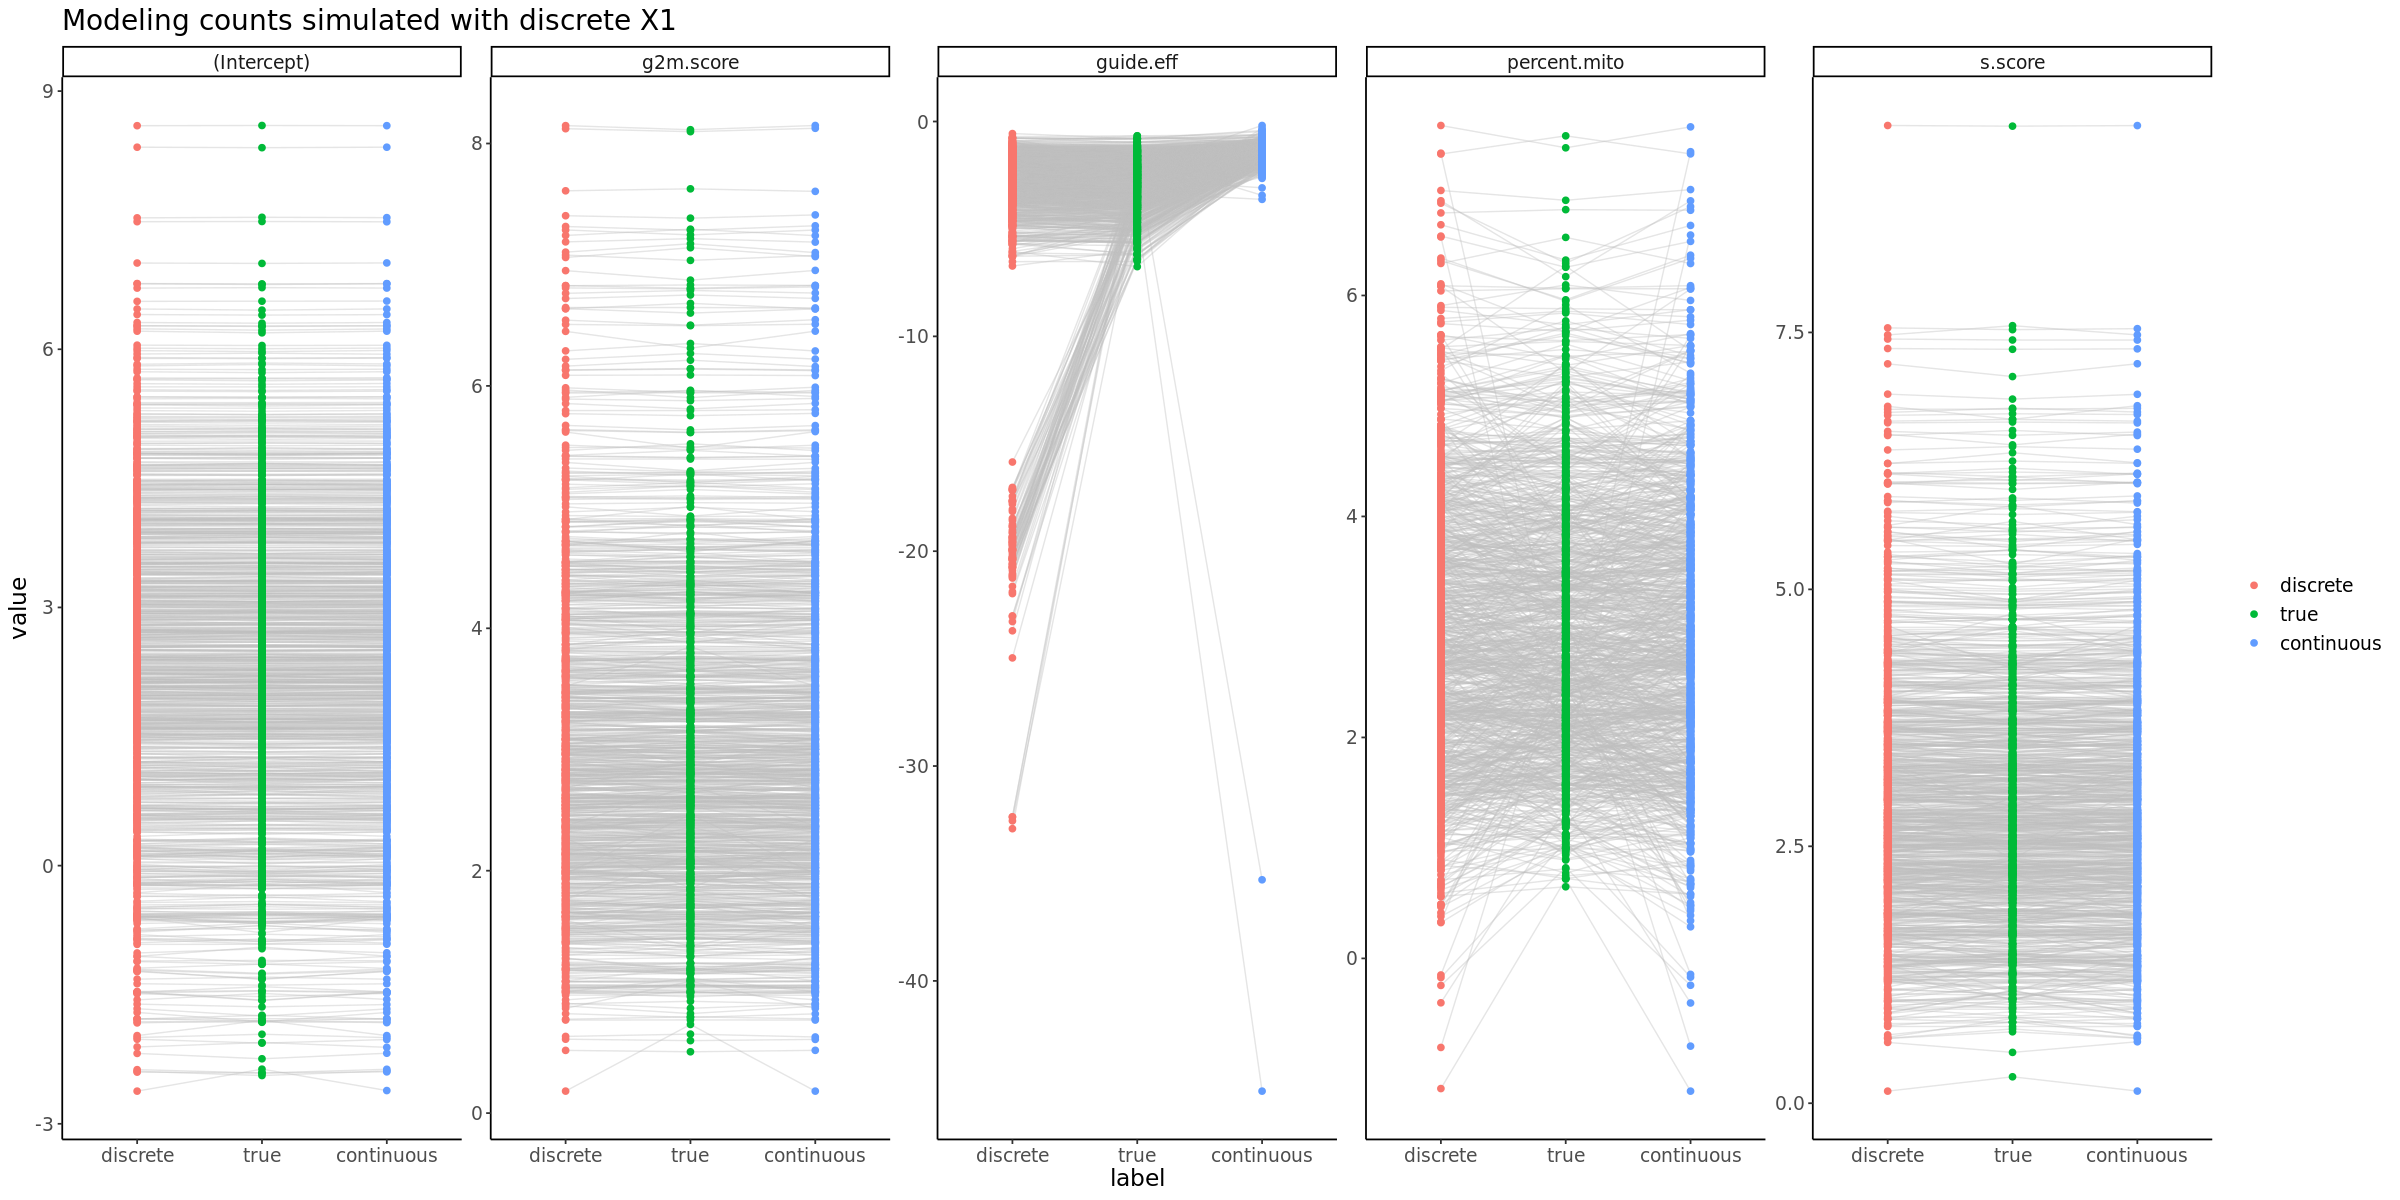

In [15]:
coeffs.lineplot <- ggplot(data=plotdf, aes(x=label, y=value, group = gene)) +
                      geom_line(color = "grey", alpha = 0.4, size = 0.4)+
                      theme_classic() +
                      geom_point(aes(color=label)) + facet_wrap(vars(coeff), ncol = 5, scales = "free") +
                    theme(text = element_text(size = 14), legend.title = element_blank()) + 
                    ggtitle("Modeling counts simulated with discrete X1")

coeffs.lineplot

In [19]:
png("/iblm/netapp/data1/jezhou/crisprQTL/coeffs_lineplot_1000_targeted_genes_4grna_disc-counts.png",
    res = 100, units = "in", height = 6, width = 14)
print(coeffs.lineplot)
dev.off()

tiff("/iblm/netapp/data1/jezhou/crisprQTL/coeffs_lineplot_1000_targeted_genes_4grna_disc-counts.tiff",
    res = 100, units = "in", height = 6, width = 14)
print(p)
dev.off()

png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

# Evaluate models fitted with continuous $X_1$ with counts simulated using continuous $X_1$ as observations

- $H_A$
- 1000 targeted genes
- 4 gRNAs per gene

In [8]:
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_cont-counts_targeting_v2"
# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs <- read.csv(file.path(data.dir,"null_coeffs.csv"))

### Plot true vs. estimated $\beta_1$

`geom_smooth()` using formula 'y ~ x'



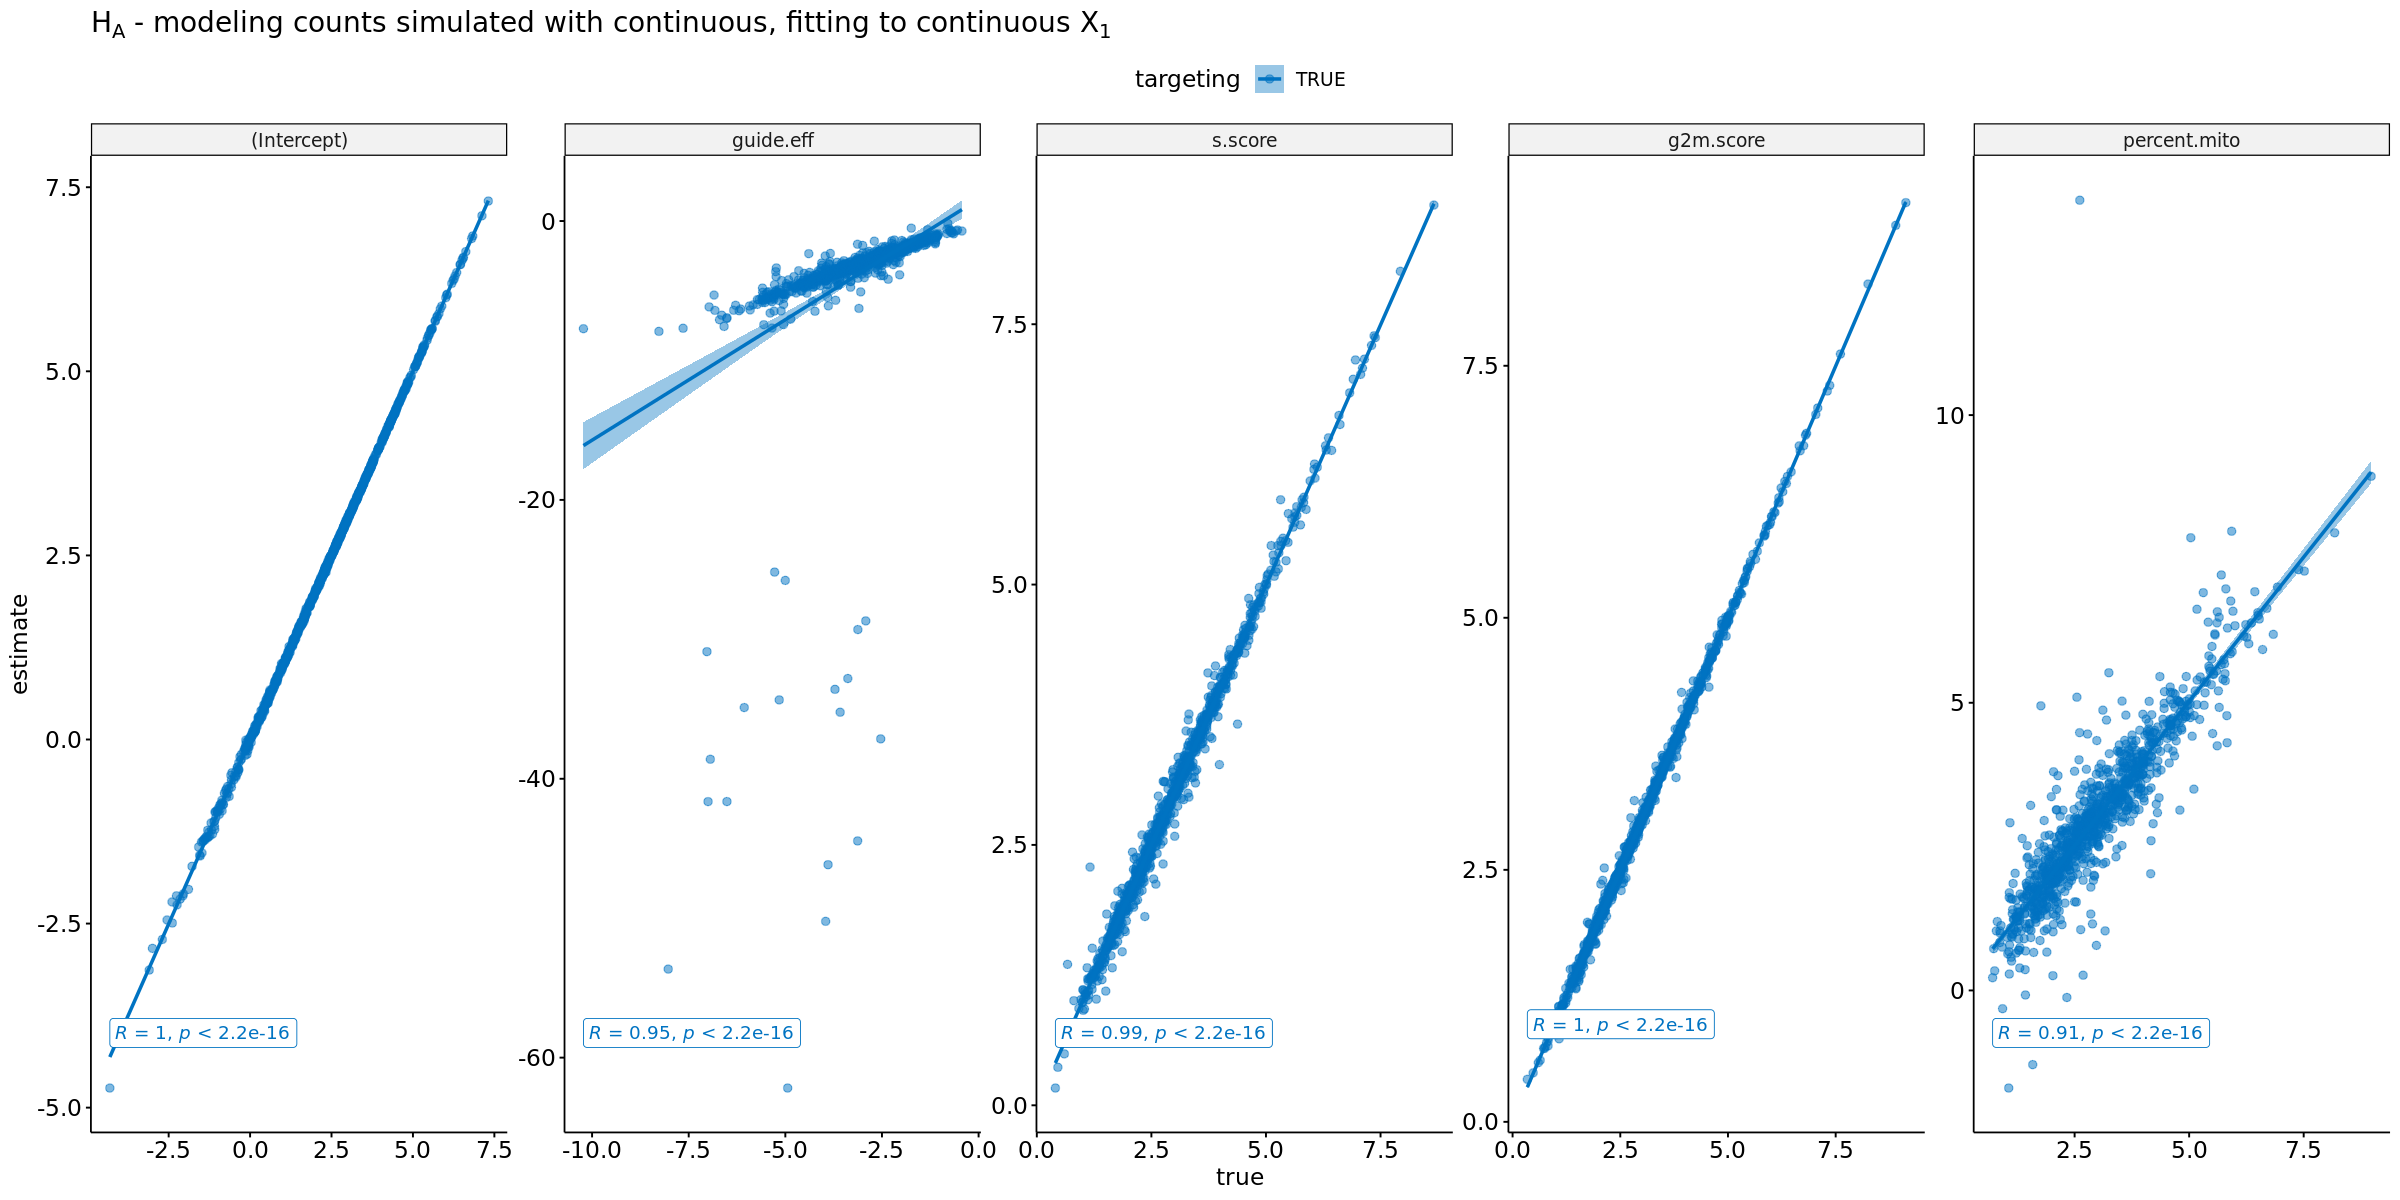

In [9]:
# rename coeffs for plot
coeff.names <- c("(Intercept)" = expression(beta[0]),
      "guide.eff" = expression(beta[1]),
      "s.score" = expression(beta[2]),
     "g2m.score" = expression(beta[3]),
     "percent.mito" = expression(beta[4]))

# plot
p <- alt.coeffs %>%
       mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
    ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
       add = "reg.line",  # Add regression line
              conf.int = TRUE
       ) + stat_cor(method = "spearman", aes(color = targeting), 
                    show.legend = FALSE, geom = "label", 
                    label.y.npc="bottom", label.x.npc = "left") + 
    facet_wrap(~term, ncol = 5, labeller =  as_labeller(coeff.names), scales = "free") + 
theme(text = element_text(size = 14)) +
ggtitle(expression(paste("H"[A] ," - modeling counts simulated with continuous, fitting to continuous X"[1])))

p

In [10]:
png(file.path(data.dir, "alt_coeffs_scatterplot_cont-counts_cont-x1.png"),
    res = 300, units = "in", height = 6, width = 12)
print(p)
dev.off()

tiff(file.path(data.dir, "alt_coeffs_scatterplot_cont-counts_cont-x1.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(p)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

# Evaluate models fitted with discrete $X_1$ with counts simulated using continuous $X_1$ as observations

- $H_A$
- 1000 targeted genes
- 4 gRNAs per gene

In [11]:
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_disc-x1_cont-counts_targeting"
# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs <- read.csv(file.path(data.dir,"null_coeffs.csv"))

### Plot true vs. estimated $\beta_1$

`geom_smooth()` using formula 'y ~ x'



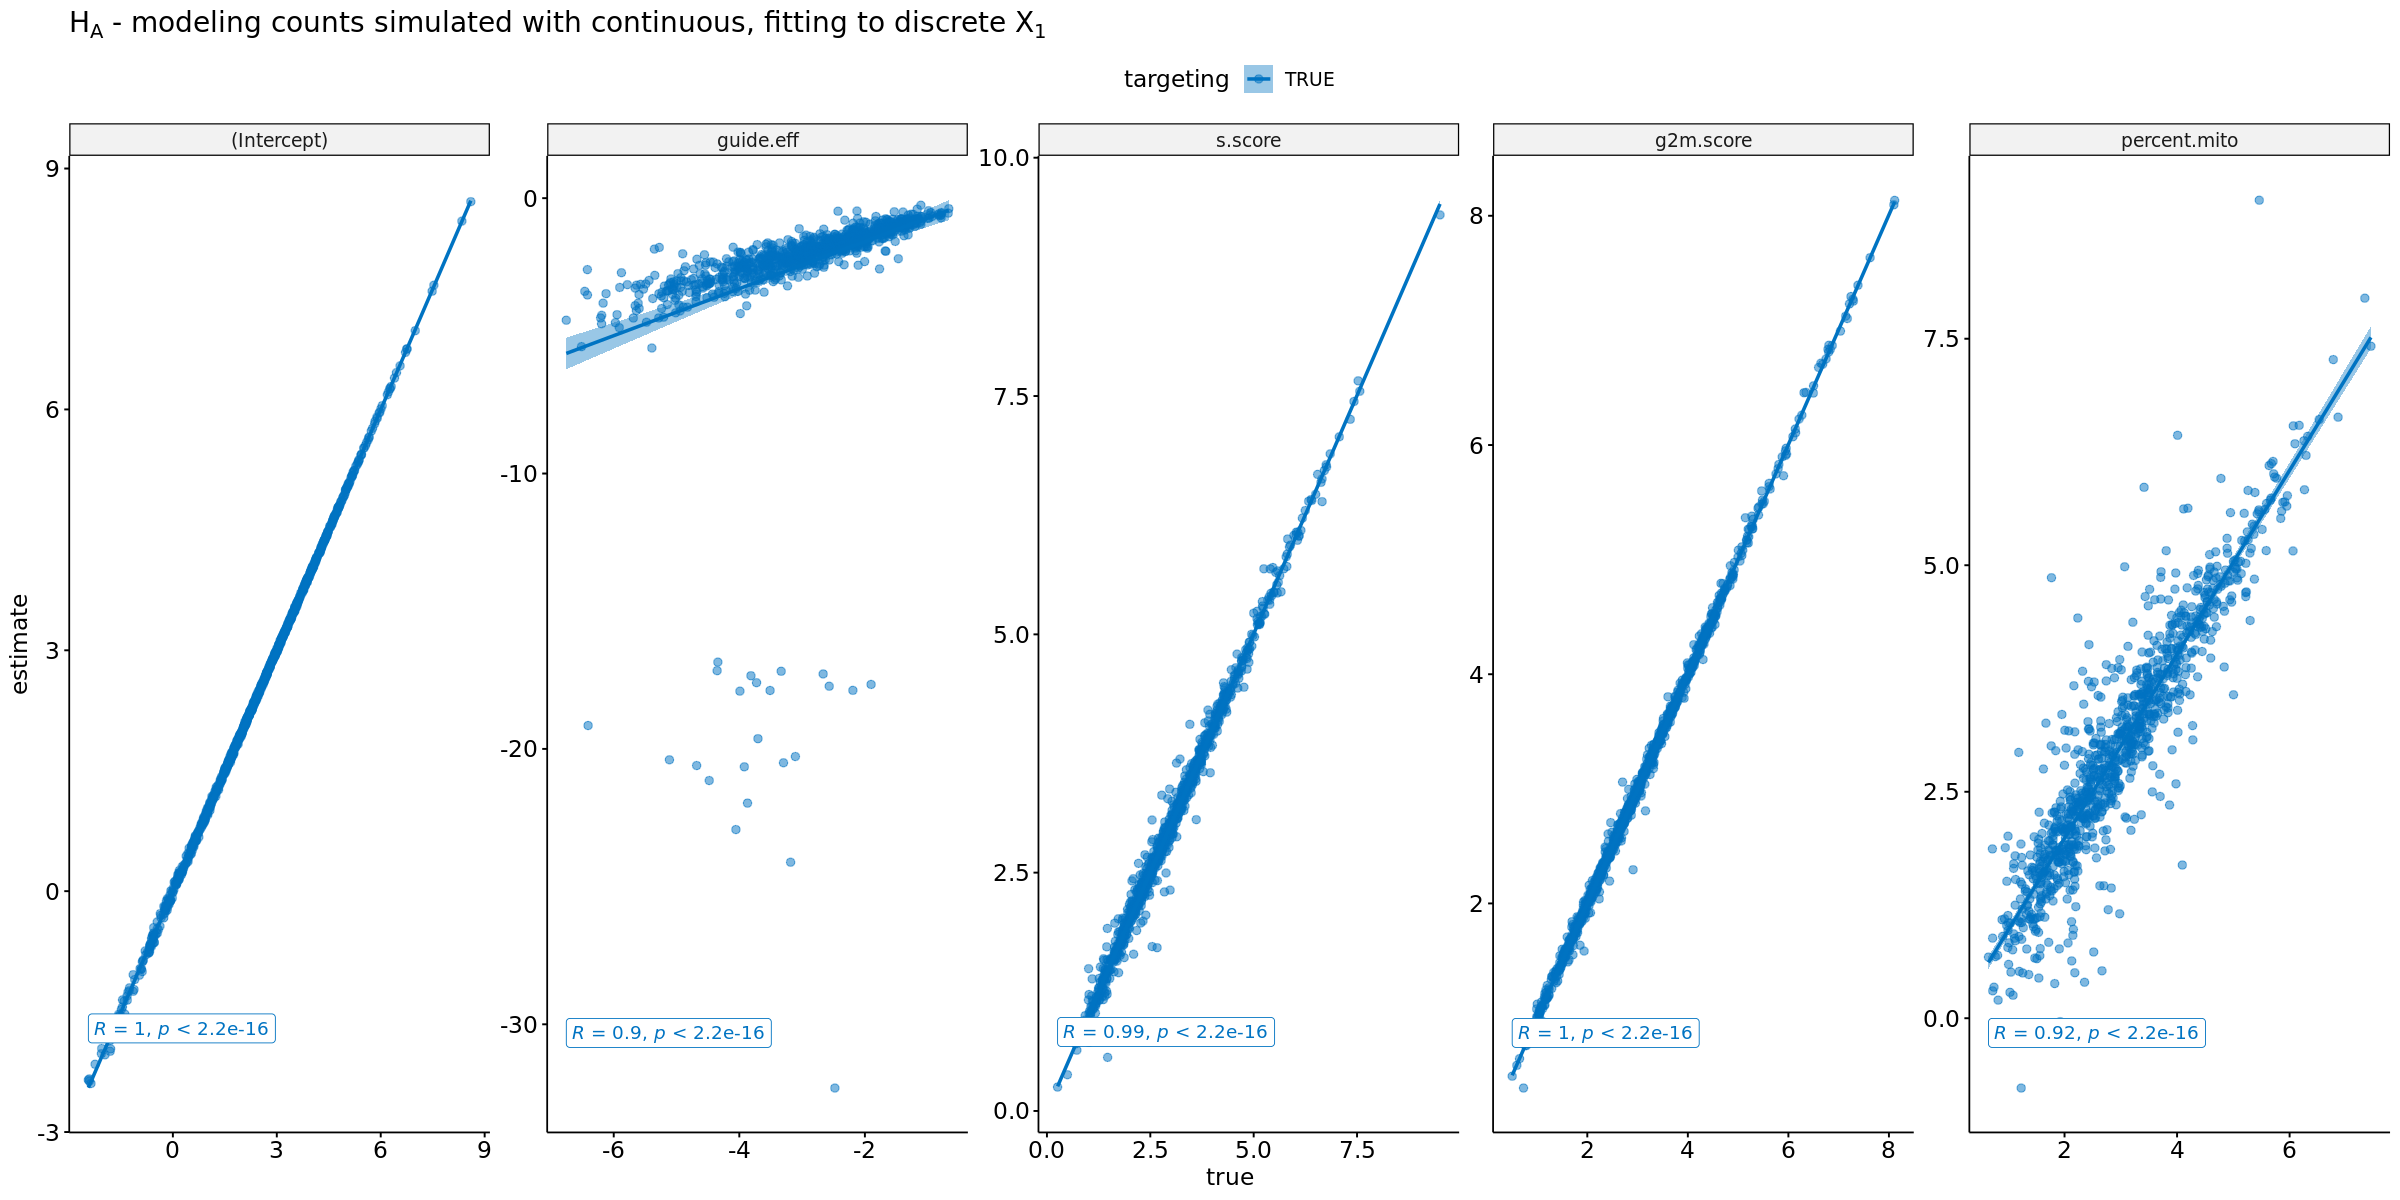

In [34]:
# rename coeffs for plot
coeff.names <- c("(Intercept)" = expression(beta[0]),
      "guide.eff" = expression(beta[1]),
      "s.score" = expression(beta[2]),
     "g2m.score" = expression(beta[3]),
     "percent.mito" = expression(beta[4]))

# plot
p <- alt.coeffs %>%
       mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
    ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
       add = "reg.line",  # Add regression line
              conf.int = TRUE
       ) + stat_cor(method = "spearman", aes(color = targeting), 
                    show.legend = FALSE, geom = "label", 
                    label.y.npc="bottom", label.x.npc = "left") + 
    facet_wrap(~term, ncol = 5, labeller =  as_labeller(coeff.names), scales = "free") + 
theme(text = element_text(size = 14)) +
ggtitle(expression(paste("H"[A] ," - modeling counts simulated with continuous, fitting to discrete X"[1])))

p

In [35]:
png(file.path(data.dir, "alt_coeffs_scatterplot_cont-counts_disc-x1.png"),
    res = 300, units = "in", height = 6, width = 12)
print(p)
dev.off()

tiff(file.path(data.dir, "alt_coeffs_scatterplot_cont-counts_disc-x1.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(p)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

# Compare estimated coeffs to true for counts simulated with continuous $X_1$

In [10]:
true.coeffs <- h5read(file = sim.fh, name = "coeffs")
guides.metadata <- h5read(file = sim.fh, name = "guides/metadata")

In [63]:
alt.coeffs.disc <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_disc-x1_cont-counts_targeting/alt_coeffs.csv")
alt.coeffs.cont <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_cont-counts_targeting/alt_coeffs.csv")


In [64]:
alt.coeffs.disc$x1 <- 'discrete'
alt.coeffs.cont$x1 <- 'continuous'

In [65]:
disc.sub <- alt.coeffs.disc %>% select(c(term, estimate, gene, x1))
cont.sub <- alt.coeffs.cont %>% select(c(term, estimate, gene, x1))
true.sub <- alt.coeffs.disc %>% select(c(term, true, gene, x1))
true.sub$x1 <- "true"

new.cols <- c("coeff", "value", "gene", "label")
colnames(disc.sub) <- new.cols
colnames(cont.sub) <- new.cols
colnames(true.sub) <- new.cols

In [66]:
plotdf <- rbind(disc.sub, cont.sub, true.sub)
plotdf$label <- factor(plotdf$label, levels=c("discrete","true","continuous"))

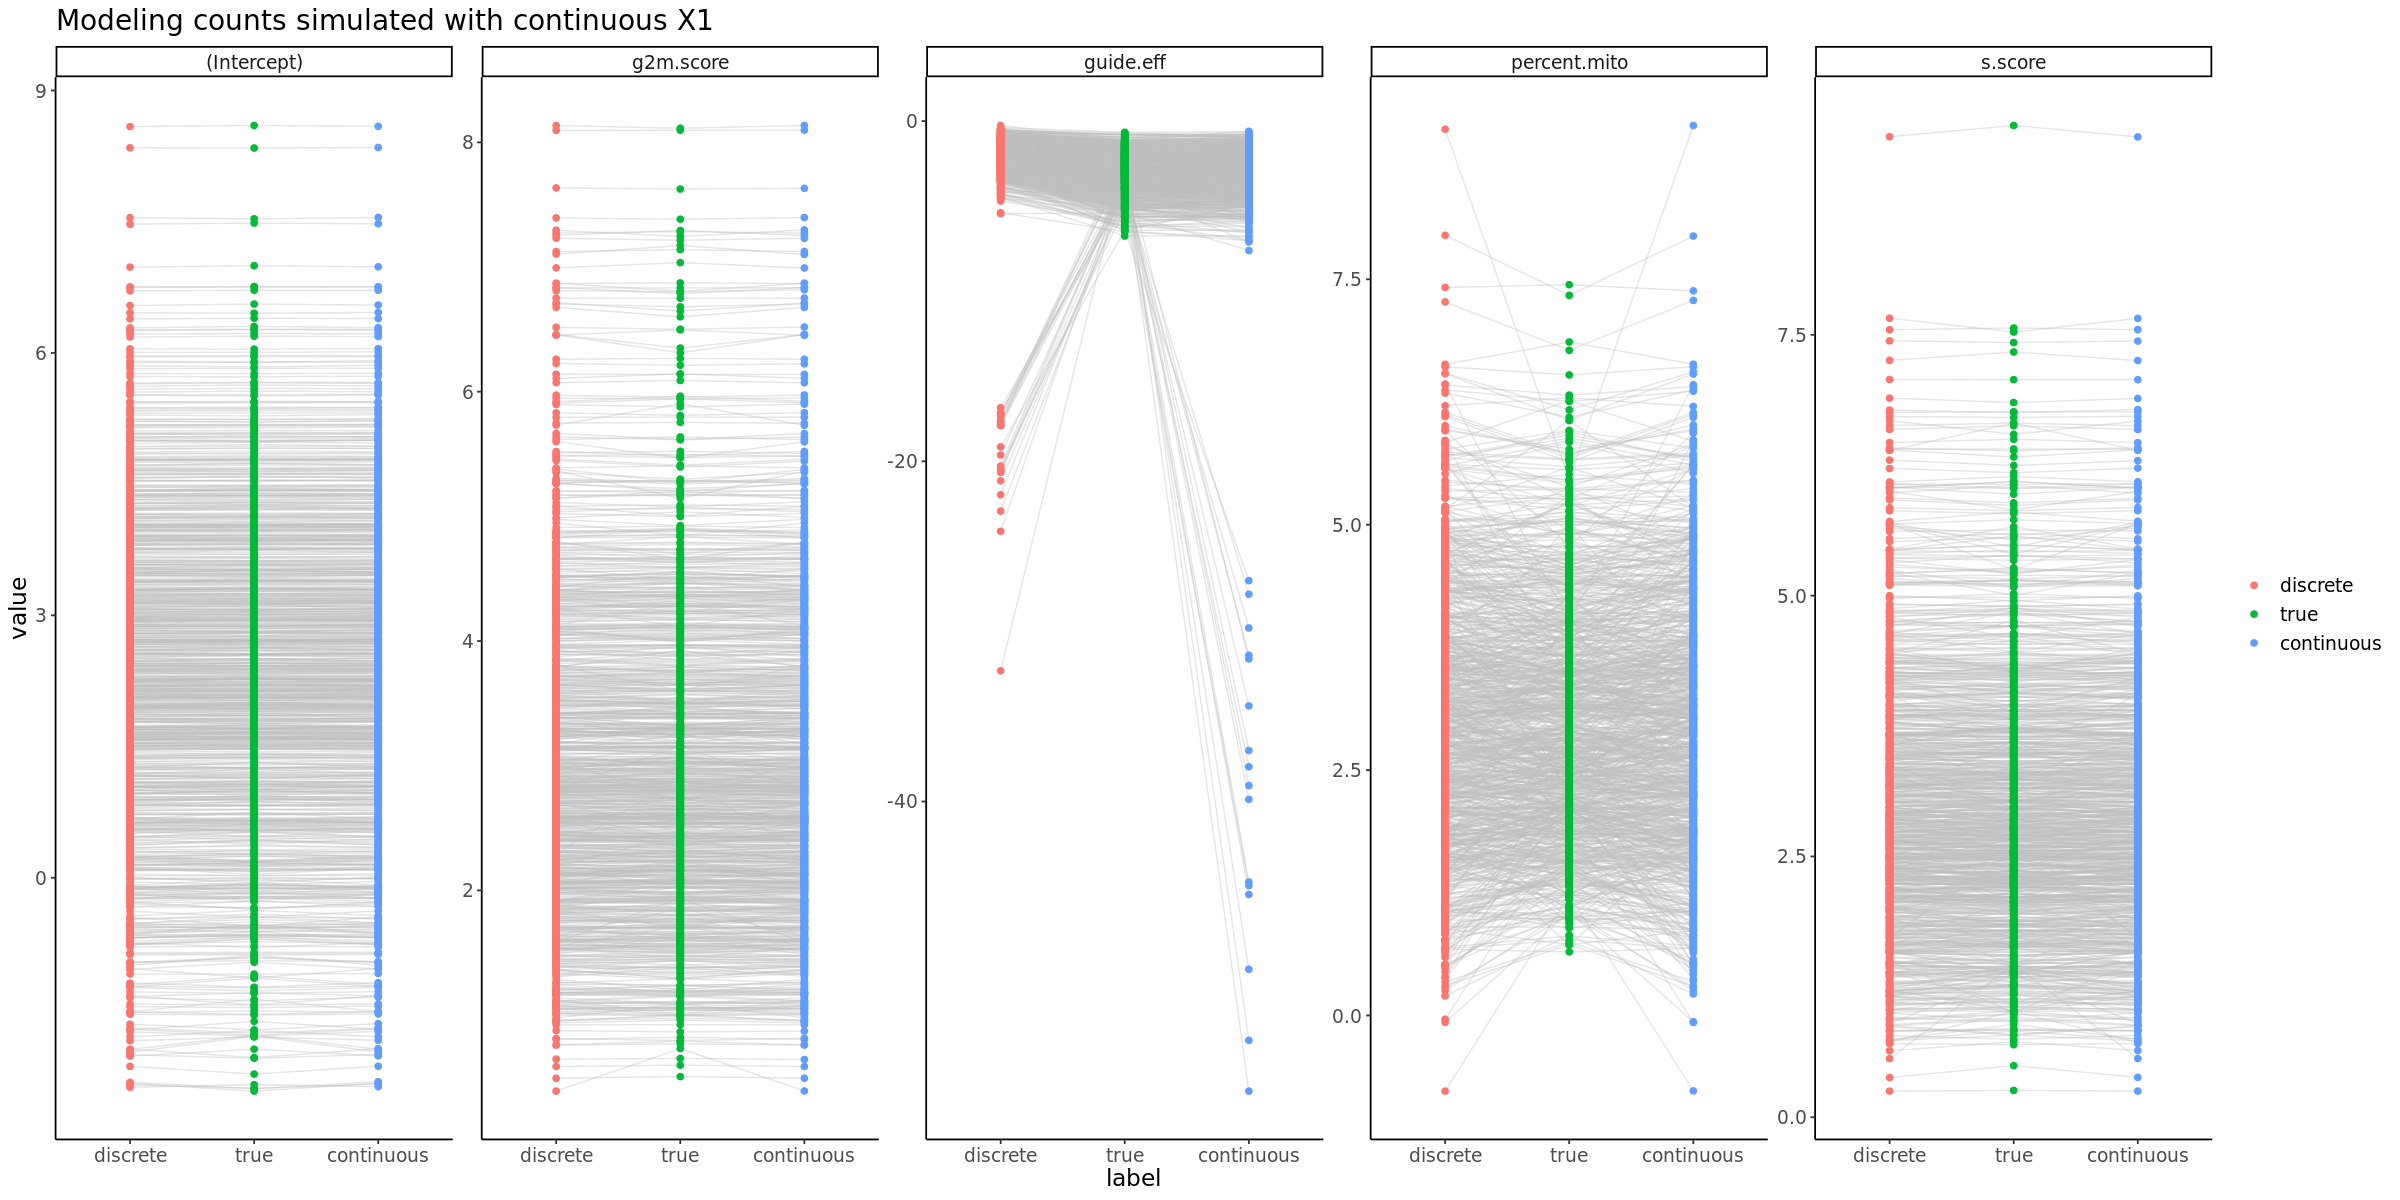

In [67]:
coeffs.lineplot <- ggplot(data=plotdf, aes(x=label, y=value, group = gene)) +
                      geom_line(color = "grey", alpha = 0.4, size = 0.4)+
                      theme_classic() +
                      geom_point(aes(color=label)) + facet_wrap(vars(coeff), ncol = 5, scales = "free") +
                    theme(text = element_text(size = 14), legend.title = element_blank()) + 
                    ggtitle("Modeling counts simulated with continuous X1")

coeffs.lineplot

In [69]:
png("/iblm/netapp/data1/jezhou/crisprQTL/coeffs_lineplot_1000_targeted_genes_4grna_cont-counts.png",
    res = 100, units = "in", height = 6, width = 14)
print(coeffs.lineplot)
dev.off()

tiff("/iblm/netapp/data1/jezhou/crisprQTL/coeffs_lineplot_1000_targeted_genes_4grna_cont-counts.tiff",
    res = 100, units = "in", height = 6, width = 14)
print(coeffs.lineplot)
dev.off()

png 
  2

png 
  2

# Facet grid scatterplots

In [56]:
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_disc-counts_targeting"
# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

disc.counts.cont.x1.alt.coeffs <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_disc-counts_targeting/alt_coeffs.csv")
disc.counts.disc.x1.alt.coeffs <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_disc-x1_disc-counts_targeting/alt_coeffs.csv")
cont.counts.cont.x1.alt.coeffs <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_cont-counts_targeting/alt_coeffs.csv")
cont.counts.disc.x1.alt.coeffs <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_disc-x1_cont-counts_targeting/alt_coeffs.csv")

disc.counts.cont.x1.alt.coeffs$counts <- 'discrete counts'
disc.counts.cont.x1.alt.coeffs$x1 <- "continuous x1"
disc.counts.disc.x1.alt.coeffs$counts <- 'discrete counts'
disc.counts.disc.x1.alt.coeffs$x1 <- 'discrete x1'
cont.counts.cont.x1.alt.coeffs$counts <- 'continuous counts'
cont.counts.cont.x1.alt.coeffs$x1 <- 'continuous x1'
cont.counts.disc.x1.alt.coeffs$counts <- 'continuous counts'
cont.counts.disc.x1.alt.coeffs$x1 <- 'discrete x1'

In [57]:
grid.plotdf <- do.call(rbind,list(disc.counts.cont.x1.alt.coeffs,
               disc.counts.disc.x1.alt.coeffs,
               cont.counts.cont.x1.alt.coeffs,
               cont.counts.disc.x1.alt.coeffs))

`geom_smooth()` using formula 'y ~ x'



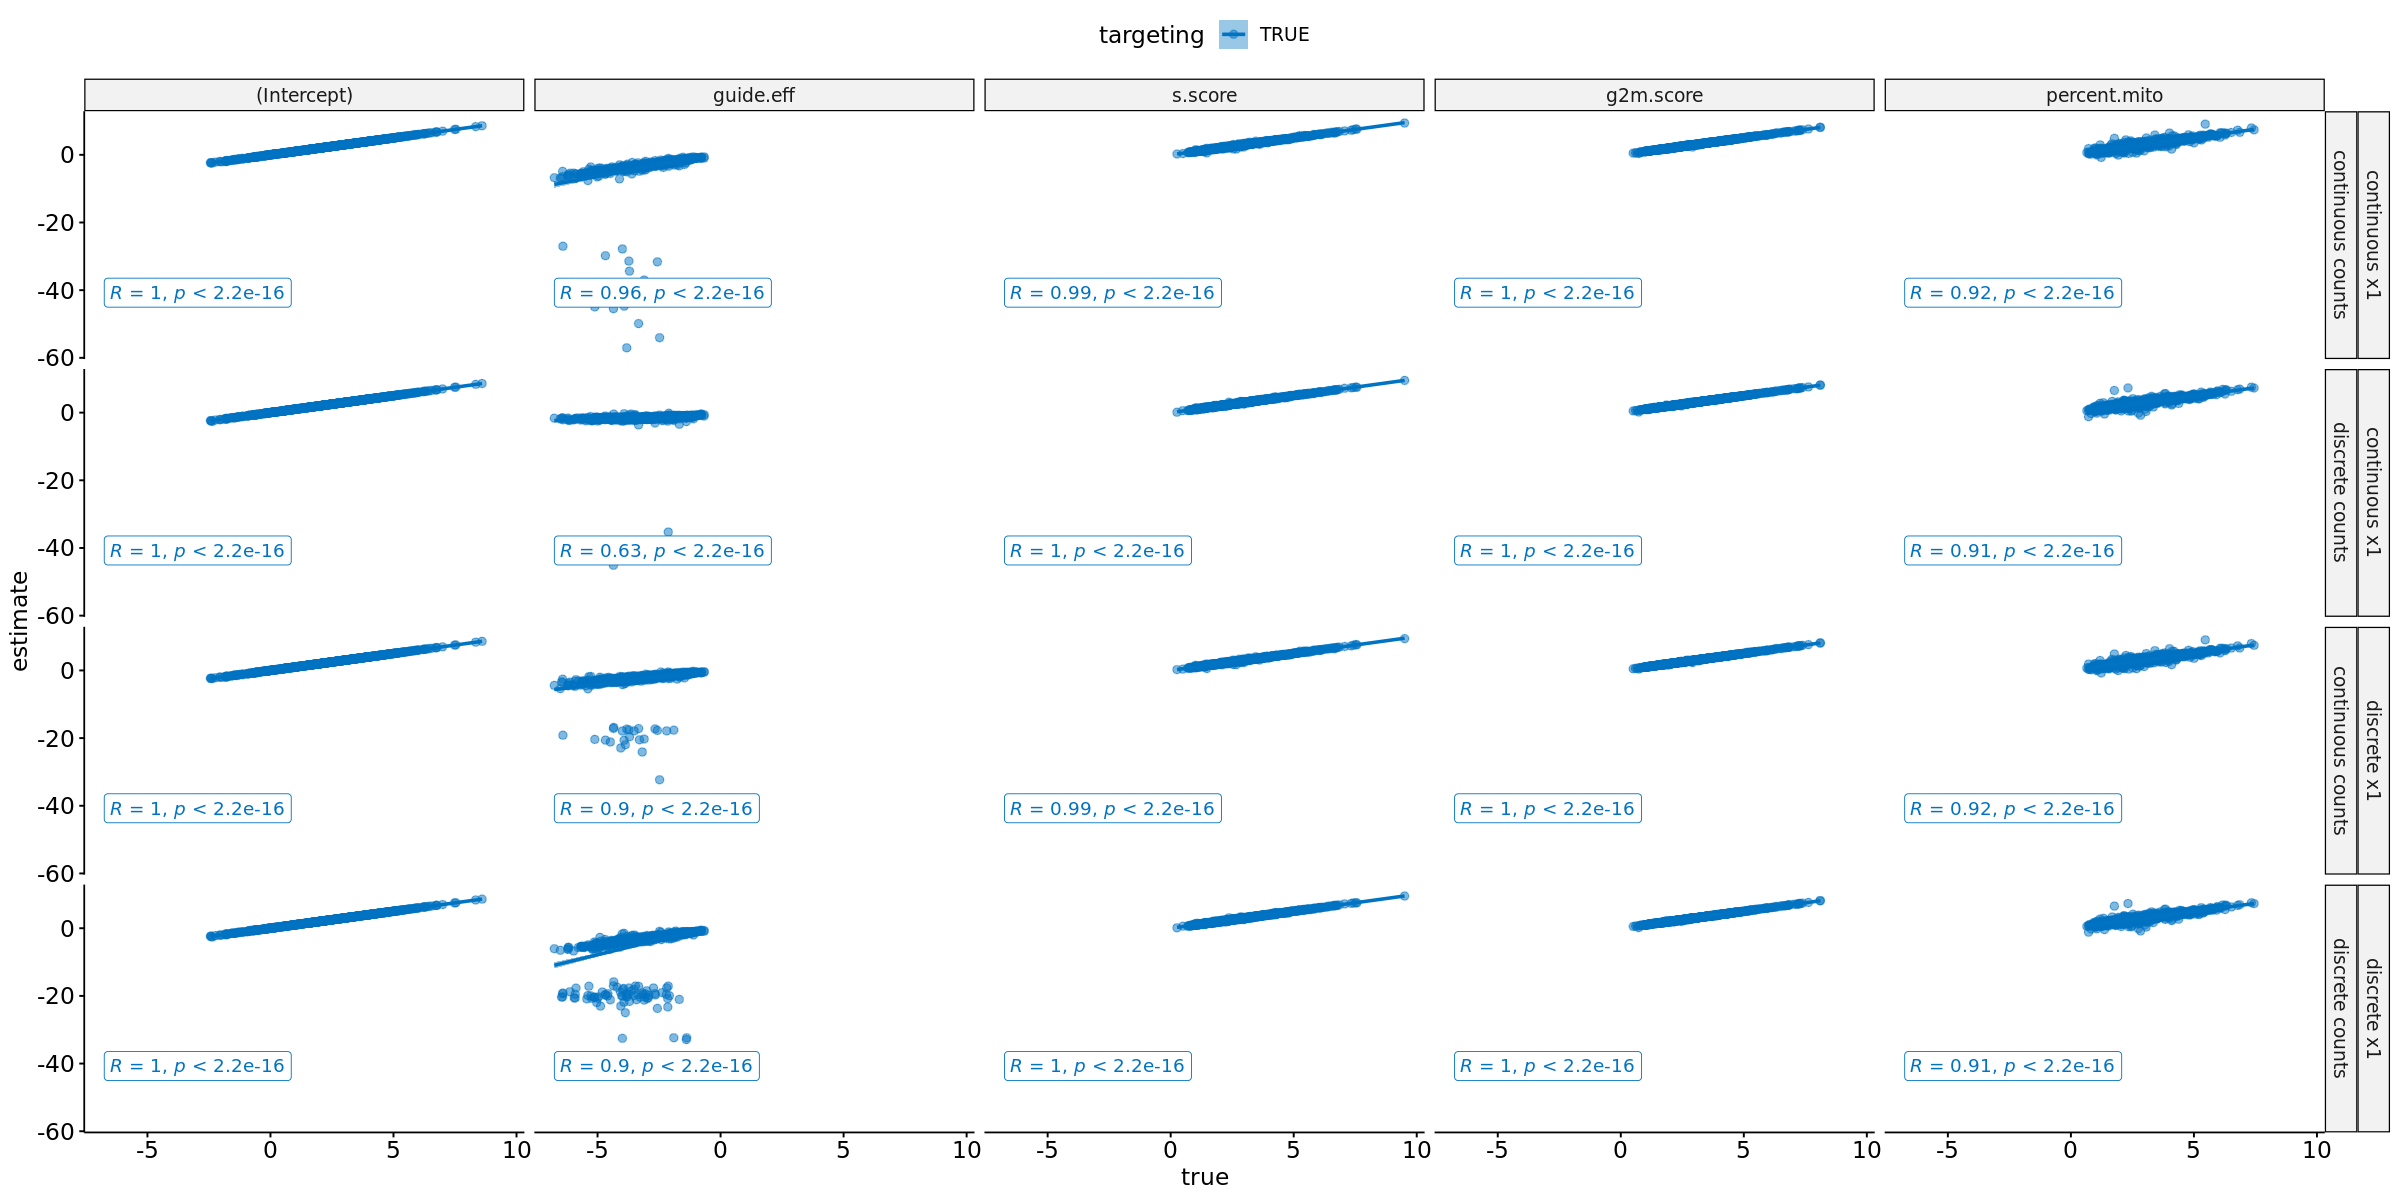

In [60]:
coeff.names <- c("(Intercept)" = expression(beta[0]),
      "guide.eff" = expression(beta[1]),
      "s.score" = expression(beta[2]),
     "g2m.score" = expression(beta[3]),
     "percent.mito" = expression(beta[4]))

# plot
p <- grid.plotdf %>%
       mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
    ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
       add = "reg.line",  # Add regression line
              conf.int = TRUE
       ) + stat_cor(method = "spearman", aes(color = targeting), 
                    show.legend = FALSE, geom = "label", 
                    label.y.npc="bottom", label.x.npc = "left") + 
#     facet_wrap(~term, ncol = 5, labeller = as_labeller(coeff.names), scales = "free") + 
    facet_grid(x1+counts ~ term) +
theme(text = element_text(size = 14)) 
# ggtitle(expression(paste("H"[A] ," - modeling counts simulated with continuous, fitting to discrete X"[1])))

p

In [70]:
png("/iblm/netapp/data1/jezhou/crisprQTL/grid_coeff_scatterplot_1000genes_4gRNA_all-scenarios.png",
    res = 100, units = "in", height = 8, width = 14)
print(p)
dev.off()

tiff("/iblm/netapp/data1/jezhou/crisprQTL/grid_coeff_scatterplot_1000genes_4gRNA_all-scenarios.tiff",
    res = 100, units = "in", height = 8, width = 14)
print(p)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2